In [18]:
import warnings
warnings.filterwarnings('ignore')
%autosave 5

Autosaving every 5 seconds


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from datetime import datetime


# KNN

In [20]:
# Import iris dataset
iris = datasets.load_iris()

# Create dataframe to store iris data
iris_df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
iris_df['target'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
# Import estimator
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)

#Create an instance of the estimator
flower_classifier = KNeighborsClassifier(n_neighbors = 3)
dir(flower_classifier)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 'algorithm',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'predict',
 'predict_proba',
 'radius',
 'score',
 'set_params',
 'weights']

In [10]:
# Train model
flower_classifier.fit(X=iris.data, y=iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
# Get features of new flowers
new_flowers = np.array([[5.5, 2.1, 2.0, 0.9],
                        [7.2, 3.8, 9.0, 1.9]
                       , [6, 3.8, 9.0, 2]
                       , [7.2, 3.8, 9.0, 4]
                       , [6, 3.8, 9.0, 1.9]
                       , [5, 3.8, 9.0, 3]
                       , [6, 3.8, 9.0, 3]
                       , [7.2, 3.8, 9.0, 4]])

In [13]:
# Obtain predicted values
new_flowers_pred = flower_classifier.predict(new_flowers)
print (f'Predicted species of new flowers: {new_flowers_pred}')

Predicted species of new flowers: [0 2 2 2 2 2 2 2]


In [14]:
new_flowers_actual = np.array([[0,1,2,2,2,2,2,2]])

In [ ]:
# Measure accuracy
roc_auc_score(new_flowers_actual, new_flowers_pred)

# Log Regression

In [19]:
# Import data on alcohol consumption
data = pd.read_csv('student_alc.csv')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Low
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Low


In [20]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'alc'],
      dtype='object')

In [21]:
features = ['sex', 'famsize', 'age', 'studytime', 'famrel', 'goout', 'freetime', 'G3']
target = 'alc'

In [22]:
# One-hot encode categorical variables
data['sex'] = data['sex'].map({'F':0, 'M':1})
data['famsize'] = data['famsize'].map({'LE3':0, 'GT3':1})
data['alc'] = data['alc'].map({'Low':0, 'High':1})

In [29]:
X = data[features].values
y = data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)
### Does this do stratified sampling or simply splits by row order?

In [25]:
# Calculate benchmark
data['alc'].value_counts(normalize = True)

0    0.744222
1    0.255778
Name: alc, dtype: float64

In [39]:
# Import model & instantiate
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', C=1000, penalty= 'l1', random_state = 24)

#Train model
lr_model.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=24, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Predict probabilities - Option 1
y_train_pred = lr_model.predict_proba(X_train)
y_test_pred = lr_model.predict_proba(X_test)

In [41]:
# Measure AUC
roc_auc_score(y_train, y_train_pred[:,1])


0.7836929811088925

In [42]:
roc_auc_score(y_test, y_test_pred[:,1])

0.676

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

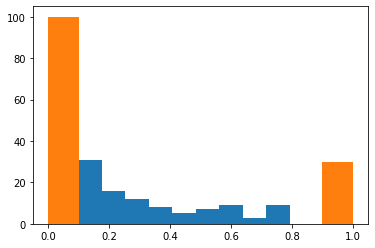

In [57]:
y_test_proba=y_test_pred[:,1]
plt.hist(pos_proba)
plt.hist(y_test)

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)

In [46]:
# Model fit - Option 2
lr_model.fit(X,y)
y_pred = lr_model.predict(X)

# Predict values - Option 2
data['predictions_logreg'] = y_pred

In [45]:
#Create confusion matrix
conf_matrix = pd.crosstab(data['alc'], data['predictions_logreg'])
conf_matrix

predictions_logreg,0,1
alc,,
0,451,32
1,105,61


In [47]:
# Calculate overall_accuracy
is_correct = y_pred == y
np.mean(is_correct)

0.7889060092449923

In [48]:
# Calculate class accuracy
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[451,  32],
       [105,  61]], dtype=int64)

# Random Forests

In [58]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

In [60]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X,y)
rf_pred = rf_classifier.predict(X)
data['rf_pred'] = rf_pred

In [65]:
# Overall accuracy
metrics.accuracy_score(y, rf_pred)

0.9938366718027735

In [66]:
# Class accuracy
metrics.confusion_matrix(y, rf_pred)

array([[482,   1],
       [  3, 163]], dtype=int64)

In [75]:
new_students = np.array([[0, 1, 19, 5, 5, 1, 1, 18]])

In [73]:
# Decode prediction
def decode(prediction):
    if prediction ==1:
        return('High')
    else:
        return('Low')

In [76]:
new_students_pred = rf_classifier.predict(new_students)
decode(new_students_pred)

'Low'

# Linear Regression

In [79]:
# Import data
housing = pd.read_csv('house.csv')

In [80]:
# Create 'House_age' variable
housing['Age'] = housing['YrSold'] - housing['YearBuilt']

# Show first five rows
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [83]:
# Determine # of houses per neighborhood and remove those with less than 30
counts = housing['Neighborhood'].value_counts()
housing = housing.loc[housing['Neighborhood'].isin(counts[counts > 30].index)]

housing.shape

(1310, 82)

In [93]:
# Store features and target
features = ['CentralAir', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'Age']
target = 'SalePrice'

In [85]:
# One-hot encode CentralAir
housing['CentralAir'] = housing['CentralAir'].map({'N':0, 'Y':1})

In [86]:
# One-hot encode Neighborhood
dummies_nb = pd.get_dummies(housing['Neighborhood'])
dummies_nb.head()

,BrkSide,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Timber
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [87]:
np.shape(dummies_nb)

(1310, 16)

In [88]:
np.shape(housing)

(1310, 82)

In [89]:
# Check dummy vars against original neighborhood data
housing['Neighborhood'].head()

0    CollgCr
2    CollgCr
3    Crawfor
4    NoRidge
5    Mitchel
Name: Neighborhood, dtype: object

In [90]:
# Join dummy variables to original dataset
housing = pd.concat([housing, dummies_nb], axis=1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Timber
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0


In [94]:
# Add dummy vars to feature list
features += list(dummies_nb.columns)

In [95]:
# Store features and target
X = housing[features].values
y = housing[target].values
n = housing.shape[0]

In [ ]:
# Calculate mean sale price for benchmark
y_mean = np.mean(y)
y_mean

In [ ]:
# Calculate benchmark RMSE
RMSE_benchmark = np.sqrt(np.sum(y-y_mean)**2)/n)
RMSE_benchmark

In [96]:
# Build linear regression model
from sklearn.linear_model import LinearRegression
np.random.seed(0)

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
housing['predictions'] = y_pred

In [97]:
# Calculate RMSE for linear regression model
RMSE_lr = np.sqrt(np.sum((y-y_pred)**2)/n)
RMSE_lr

33729.21817336611

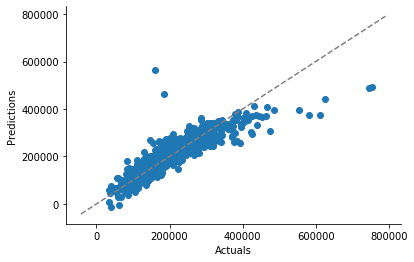

In [107]:
# Create scatter to compare predictions to actual prices
fig, ax = plt.subplots()
ax.scatter(x=housing['SalePrice'], y=housing['predictions'])
ax.set_xlabel('Actuals')
ax.set_ylabel('Predictions')


# Plot dotted diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
]
ax.plot(lims, lims, color = '0.5', linestyle = '--')

sns.despine()
plt.show()

# Time series

In [1]:
from datetime import datetime

In [6]:
data = pd.read_csv('AirPassengers.csv')


In [8]:
#Parse strings to datetime type
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format = True)
indexedDataset = data.set_index(['Month'])

In [9]:
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
indexedDataset.shape

(144, 1)

In [11]:
# Get percentage (%) of nulls by feature
indexedDataset.isnull().mean() * 100

#Passengers    0.0
dtype: float64

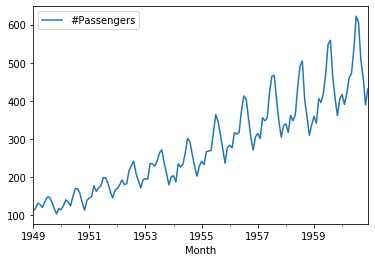

In [12]:
indexedDataset.plot()

In [15]:
indexedDataset.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [14]:
#Check stationarity
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(indexedDataset, autolag='AIC')
print('p-val of the ADF test:', adf_result[1])

p-val of the ADF test: 0.991880243437641


In [16]:
simple_ma = indexedDataset['Passengers'].rolling(window=12).mean()
simple_std = indexedDataset['Passengers'].rolling(window=12).std()

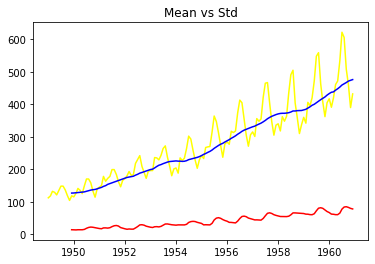

In [17]:
plt.title('Mean vs Std')
plt.plot(indexedDataset, color = 'yellow')
plt.plot(simple_ma, color = 'blue')
plt.plot(simple_std, color = 'red')